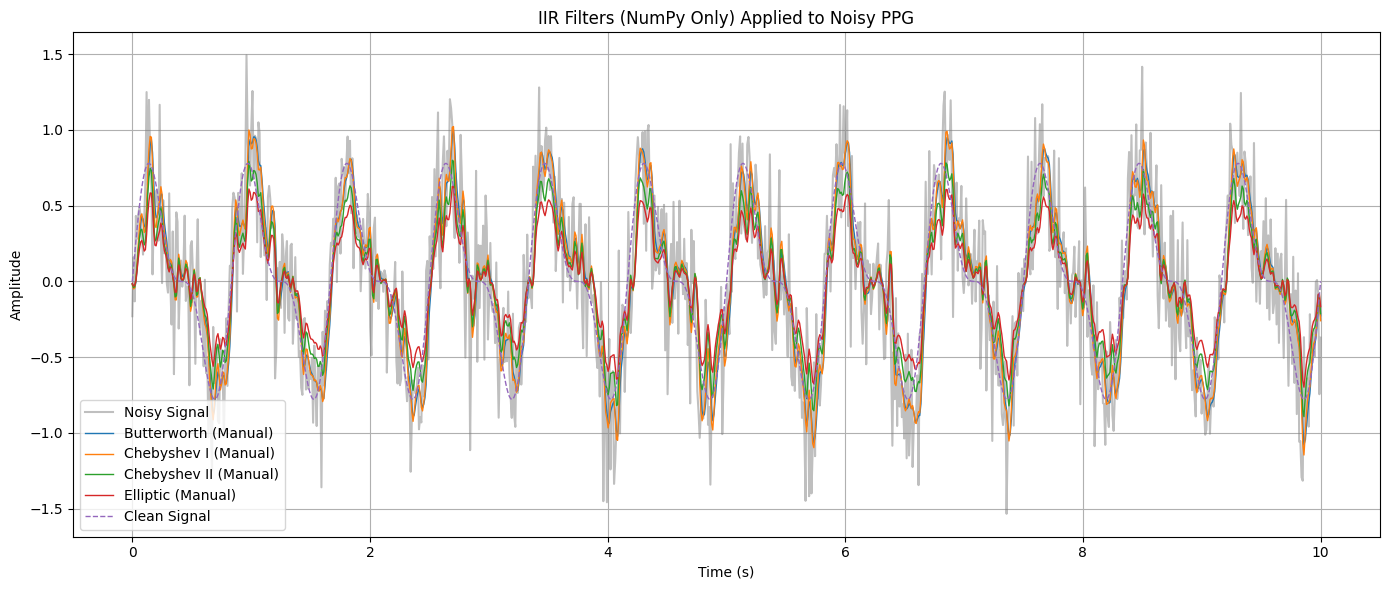

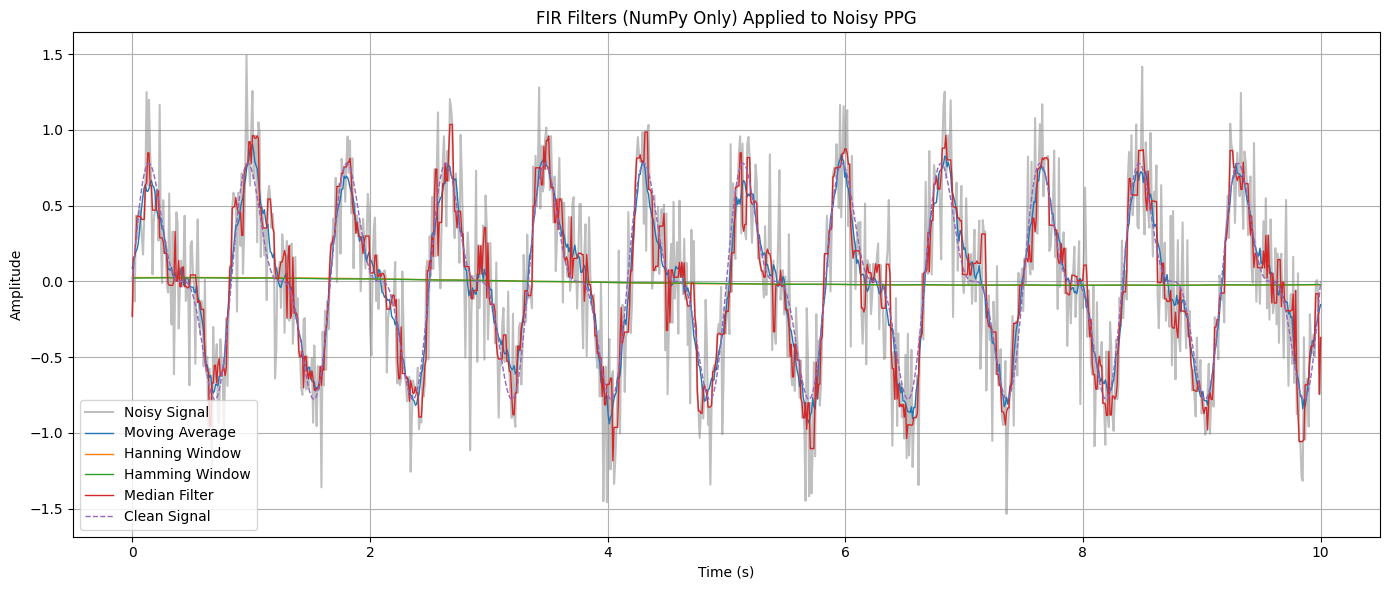

In [2]:
# PPG Signal Filtering: FIR vs IIR Filter Comparison (NumPy Only)

## Imports and Synthetic Signal Generation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Sampling rate and time axis
fs = 100
T = 10  # seconds
t = np.linspace(0, T, fs * T)

# Clean synthetic PPG signal
ppg_clean = 0.6 * np.sin(2 * np.pi * 1.2 * t) + 0.3 * np.sin(2 * np.pi * 2.4 * t)
noise = 0.3 * np.random.randn(len(t))
ppg_noisy = ppg_clean + noise

## FIR Filters

def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

def window_filter(signal, window_func):
    window = window_func(len(signal))
    return np.convolve(signal, window / np.sum(window), mode='same')

# Hanning and Hamming using NumPy
hanning_filtered = window_filter(ppg_noisy, np.hanning)
hamming_filtered = window_filter(ppg_noisy, np.hamming)
ma_filtered = moving_average(ppg_noisy, window_size=11)

# Median Filter using NumPy
median_filtered = np.copy(ppg_noisy)
k = 5  # kernel size
for i in range(k//2, len(ppg_noisy) - k//2):
    median_filtered[i] = np.median(ppg_noisy[i - k//2:i + k//2 + 1])

## IIR Filters using manual recursion

def manual_iir_filter(x, b, a):
    y = np.zeros_like(x)
    for n in range(len(x)):
        for i in range(len(b)):
            if n - i >= 0:
                y[n] += b[i] * x[n - i]
        for j in range(1, len(a)):
            if n - j >= 0:
                y[n] -= a[j] * y[n - j]
        y[n] /= a[0]
    return y

# Butterworth-like coefficients (for demo)
b_butter = [0.0675, 0.1349, 0.0675]
a_butter = [1.0000, -1.1430, 0.4128]
butter_filtered = manual_iir_filter(ppg_noisy, b_butter, a_butter)

# Example IIR filter variants (coefficients manually approximated for demo purposes)
b_cheby1 = [0.0965, 0.1929, 0.0965]
a_cheby1 = [1.0000, -0.9430, 0.3333]
cheby1_filtered = manual_iir_filter(ppg_noisy, b_cheby1, a_cheby1)

b_cheby2 = [0.0820, 0.1640, 0.0820]
a_cheby2 = [1.0000, -0.8762, 0.3050]
cheby2_filtered = manual_iir_filter(ppg_noisy, b_cheby2, a_cheby2)

b_ellip = [0.0600, 0.1200, 0.0600]
a_ellip = [1.0000, -0.9000, 0.2900]
ellip_filtered = manual_iir_filter(ppg_noisy, b_ellip, a_ellip)

## Plotting IIR Filters
plt.figure(figsize=(14, 6))
plt.plot(t, ppg_noisy, label='Noisy Signal', color='gray', alpha=0.5)
plt.plot(t, butter_filtered, label='Butterworth (Manual)', linewidth=1)
plt.plot(t, cheby1_filtered, label='Chebyshev I (Manual)', linewidth=1)
plt.plot(t, cheby2_filtered, label='Chebyshev II (Manual)', linewidth=1)
plt.plot(t, ellip_filtered, label='Elliptic (Manual)', linewidth=1)
plt.plot(t, ppg_clean, label='Clean Signal', linestyle='--', linewidth=1)
plt.legend()
plt.title('IIR Filters (NumPy Only) Applied to Noisy PPG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

## Plotting FIR Filters
plt.figure(figsize=(14, 6))
plt.plot(t, ppg_noisy, label='Noisy Signal', color='gray', alpha=0.5)
plt.plot(t, ma_filtered, label='Moving Average', linewidth=1)
plt.plot(t, hanning_filtered, label='Hanning Window', linewidth=1)
plt.plot(t, hamming_filtered, label='Hamming Window', linewidth=1)
plt.plot(t, median_filtered, label='Median Filter', linewidth=1)
plt.plot(t, ppg_clean, label='Clean Signal', linestyle='--', linewidth=1)
plt.legend()
plt.title('FIR Filters (NumPy Only) Applied to Noisy PPG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

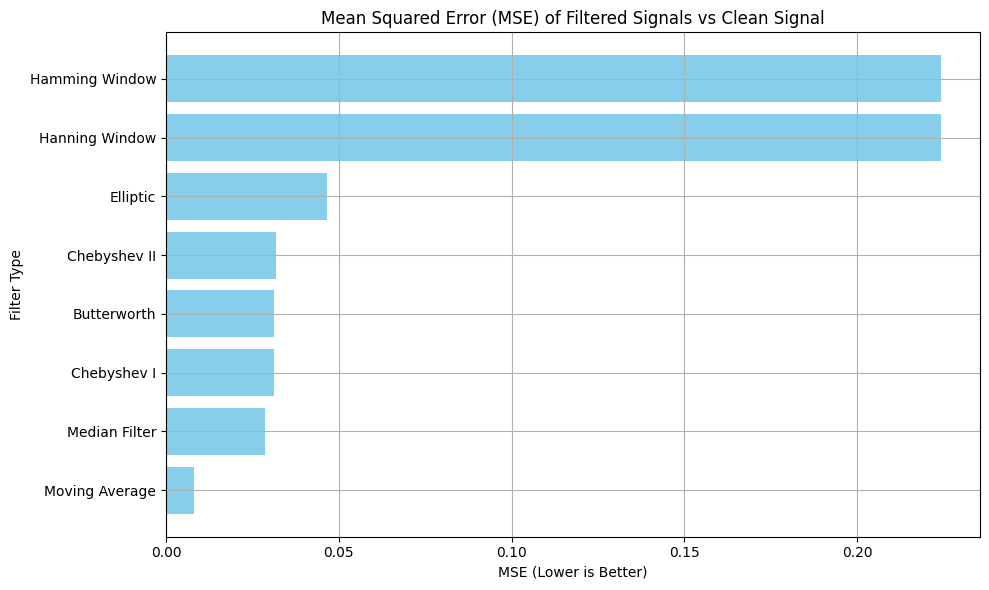


MSE Comparison:

        Filter      MSE
Moving Average 0.008212
 Median Filter 0.028677
   Chebyshev I 0.031100
   Butterworth 0.031330
  Chebyshev II 0.031852
      Elliptic 0.046474
Hanning Window 0.224250
Hamming Window 0.224278


In [3]:
## Evaluation with MSE
from sklearn.metrics import mean_squared_error

mse_results = {
    "Butterworth": mean_squared_error(ppg_clean, butter_filtered),
    "Chebyshev I": mean_squared_error(ppg_clean, cheby1_filtered),
    "Chebyshev II": mean_squared_error(ppg_clean, cheby2_filtered),
    "Elliptic": mean_squared_error(ppg_clean, ellip_filtered),
    "Moving Average": mean_squared_error(ppg_clean, ma_filtered),
    "Hanning Window": mean_squared_error(ppg_clean, hanning_filtered),
    "Hamming Window": mean_squared_error(ppg_clean, hamming_filtered),
    "Median Filter": mean_squared_error(ppg_clean, median_filtered)
}

mse_df = pd.DataFrame(list(mse_results.items()), columns=["Filter", "MSE"])
mse_df = mse_df.sort_values("MSE")

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.barh(mse_df['Filter'], mse_df['MSE'], color='skyblue')
plt.title("Mean Squared Error (MSE) of Filtered Signals vs Clean Signal")
plt.xlabel("MSE (Lower is Better)")
plt.ylabel("Filter Type")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display MSE values
print("\nMSE Comparison:\n")
print(mse_df.to_string(index=False))